(51, 2)
(51,)


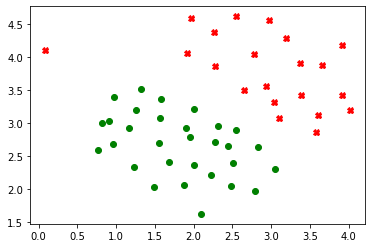

In [19]:
import re
import numpy as np
from matplotlib import pyplot
from scipy import optimize
from scipy.io import loadmat
%matplotlib inline
data=loadmat('ex6data1.mat')
data.keys()
X=data['X']
y=data['y'].ravel()
print(X.shape)
print(y.shape)
def plotData(X,y):
    pos=y==1
    neg=y==0
    pyplot.plot(X[pos,0],X[pos,1],'X',color='red')
    pyplot.plot(X[neg,0],X[neg,1],'o',color='green')
    pyplot.show()
plotData(X,y)

(100, 100)
[[0.086405   0.12608778 0.16577056 ... 3.93563444 3.97531722 4.015     ]
 [0.086405   0.12608778 0.16577056 ... 3.93563444 3.97531722 4.015     ]
 [0.086405   0.12608778 0.16577056 ... 3.93563444 3.97531722 4.015     ]
 ...
 [0.086405   0.12608778 0.16577056 ... 3.93563444 3.97531722 4.015     ]
 [0.086405   0.12608778 0.16577056 ... 3.93563444 3.97531722 4.015     ]
 [0.086405   0.12608778 0.16577056 ... 3.93563444 3.97531722 4.015     ]]
(100, 100)
[[1.6177     1.6177     1.6177     ... 1.6177     1.6177     1.6177    ]
 [1.64798788 1.64798788 1.64798788 ... 1.64798788 1.64798788 1.64798788]
 [1.67827576 1.67827576 1.67827576 ... 1.67827576 1.67827576 1.67827576]
 ...
 [4.55562424 4.55562424 4.55562424 ... 4.55562424 4.55562424 4.55562424]
 [4.58591212 4.58591212 4.58591212 ... 4.58591212 4.58591212 4.58591212]
 [4.6162     4.6162     4.6162     ... 4.6162     4.6162     4.6162    ]]
[[0.086405   0.12608778 0.16577056 ... 3.93563444 3.97531722 4.015     ]
 [1.6177     1.61

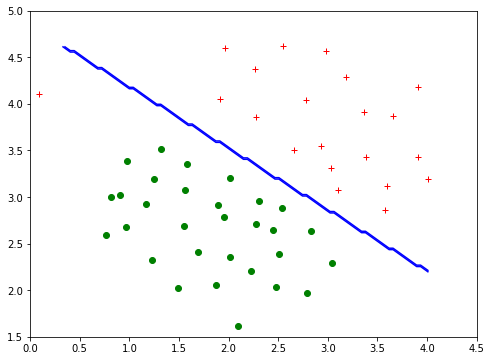

In [22]:
pos=y==1
neg=y==0
from sklearn.svm import SVC
classifier=SVC(kernel="linear",max_iter=1000)
classifier.fit(X,y)
pyplot.figure(figsize=(8,6))
pyplot.plot(X[pos,0],X[pos,1],'+',color='red')
pyplot.plot(X[neg,0],X[neg,1],'o',color='green')
X1,X2=np.meshgrid(np.linspace(X[:,0].min(),X[:,0].max(),num=100),np.linspace(X[:,1].min(),X[:,1].max(),num=100))
print(X1.shape)
print(X1)
print(X2.shape)
print(X2)
Xc=X1.ravel()
Xw=np.array([X1.ravel(),X2.ravel()])
print(Xw)
print(Xw.shape)
print(Xc.shape)
print(classifier.predict(np.array([X1.ravel(),X2.ravel()]).T))
#you have to make a meshgrid of two same shape array X1,X2 
#we ravel X1 and X2 X1 has all number same in particular column whereas X2 has all number same in particular row
#so when we make np.array by ravelling all possible cobination of X1[i,j] and X2[i,j]
#2* 10000 matrix np.array so transpose i.e in each row there are two x1, x2 and 1 value will be predicted so
#final prediction is of size 10000*1 and hence reshape it
pyplot.contour(X1,X2,classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),1,colors="b")
pyplot.xlim(0,4.5)
pyplot.ylim(1.5,5)
pyplot.show()


C:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: UserWarning: The following kwargs were not used by contour: 'color'
  


(1.5, 5)

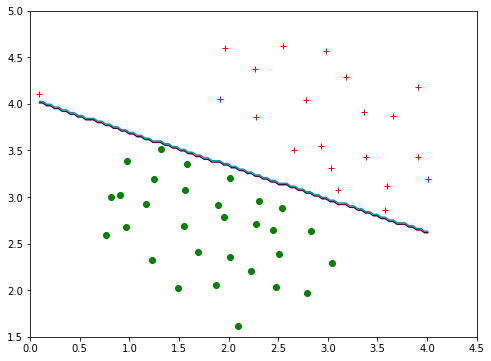

In [23]:
#changing C value for this svm
classifier2=SVC(C=100,kernel="linear")
classifier2.fit(X,y)
pyplot.figure(figsize=(8,6))
pyplot.plot(X[pos,0],X[pos,1],'+',color='red')
pyplot.plot(X[neg,0],X[neg,1],'o',color='green')
X3,X4=np.meshgrid(np.linspace(np.min(X[:,0]),np.max(X[:,0]),num=100),np.linspace(np.min(X[:,1]),np.max(X[:,1]),num=100))
pyplot.contour(X3,X4,classifier2.predict(np.array([X3.ravel(),X4.ravel()]).T).reshape(X3.shape),1,color='blue')
pyplot.xlim(0,4.5)
pyplot.ylim(1.5,5)
#overfitting at C=100

(863, 2)


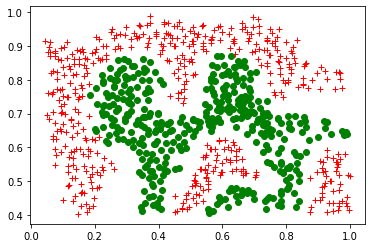

0.0449309
0.998848
0.402632
0.988596


In [33]:
data2=loadmat('ex6data2.mat')
data2.keys()
Xnew=data2['X']
ynew=data2['y'].ravel()
#print(ynew)
print(Xnew.shape)
#print(Xnew)
pos2=ynew==1
neg2=ynew==0
pyplot.plot(Xnew[pos2,0],Xnew[pos2,1],'+',color='red')
pyplot.plot(Xnew[neg2,0],Xnew[neg2,1],'o',color='green')
pyplot.show()
print(np.min(Xnew[:,0]))
print(np.max(Xnew[:,0]))
print(np.min(Xnew[:,1]))
print(np.max(Xnew[:,1]))

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: UserWarning: The following kwargs were not used by contour: 'color'
  


(0.4, 1)

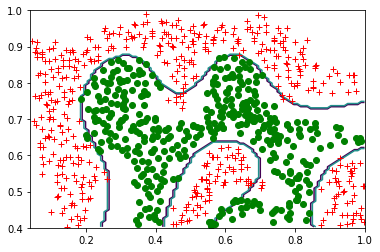

In [39]:
classifier3=SVC(kernel="rbf",gamma=30)
classifier3.fit(Xnew,ynew)
pyplot.plot(Xnew[pos2,0],Xnew[pos2,1],'+',color='red')
pyplot.plot(Xnew[neg2,0],Xnew[neg2,1],'o',color='green')
X5,X6=np.meshgrid(np.linspace(np.min(Xnew[:,0]),np.max(Xnew[:,0]),num=100),np.linspace(np.min(Xnew[:,1]),np.max(Xnew[:,1]),num=100))
pyplot.contour(X5,X6,classifier3.predict(np.array([X5.ravel(),X6.ravel()]).T).reshape(X5.shape),1,color="blue")
pyplot.xlim(0.04,1)
pyplot.ylim(0.4,1)
#changing C and gamma value will affect the partition of training example
#increasing C and gamma value will ofcourse help in making partition changing towards overfitting

(211, 2)
(200, 2)
(211,)
0.3
100.0


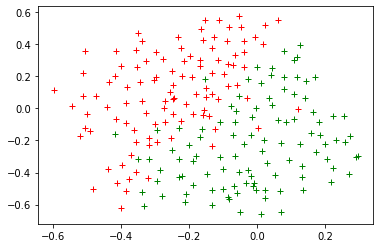

In [45]:
#finding optimal value of C and gamma on new image
#increasing C increases overfitting high variance low bias
#large gamma means softer bump hence low variance high bias
data3=loadmat("ex6data3.mat")
data3.keys()
Xnew1=data3['X']
Xval=data3['Xval']
yval=data3['yval'].ravel()
ynew1=data3['y'].ravel()
print(Xnew1.shape)
print(Xval.shape)
print(ynew1.shape)
pos3=ynew1==1
neg3=ynew1==0
pyplot.plot(Xnew1[pos3,0],Xnew1[pos3,1],'+',color='red')
pyplot.plot(Xnew1[neg3,0],Xnew1[neg3,1],'+',color='green')
vals=[0.001,0.01,0.03,0.1,0.3,1,3,10,30]
best_c=0
best_gamma=0
acc=0
for i in vals:
    C=i
    for j in vals:
        gamma=1/j
        classifier5=SVC(C=C,gamma=gamma)
        classifier5.fit(Xnew1,ynew1)
        prediction=classifier5.predict(Xval)
        score=classifier5.score(Xval,yval)
        if(score>acc):
            acc=score
            best_c=C
            best_gamma=gamma
print(best_c)
print(best_gamma)

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: UserWarning: The following kwargs were not used by contour: 'color'
  


(-0.7, 0.5)

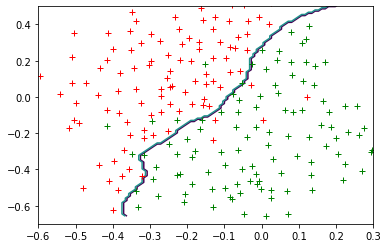

In [47]:
classifier4=SVC(C=best_c,gamma=best_gamma)
classifier4.fit(Xnew1,ynew1)
pyplot.plot(Xnew1[pos3,0],Xnew1[pos3,1],'+',color='red')
pyplot.plot(Xnew1[neg3,0],Xnew1[neg3,1],'+',color='green')
X7,X8=np.meshgrid(np.linspace(np.min(Xnew1[:,0]),np.max(Xnew1[:,0]),num=100),np.linspace(np.min(Xnew1[:,1]),np.max(Xnew1[:,1]),num=100))
pyplot.contour(X7,X8,classifier4.predict(np.array([X7.ravel(),X8.ravel()]).T).reshape(X7.shape),1,color='blue')
pyplot.xlim(-0.6,0.3)
pyplot.ylim(-0.7,0.5)
